In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score, roc_curve, auc,roc_auc_score
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

In [3]:
df =pd.read_csv("/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
df.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

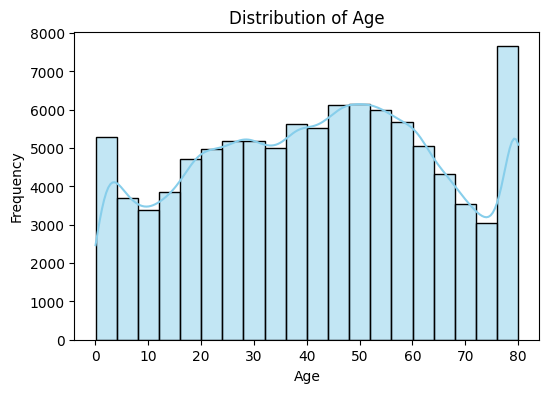

In [7]:
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 0.98, 'Histograms of Numerical Features')

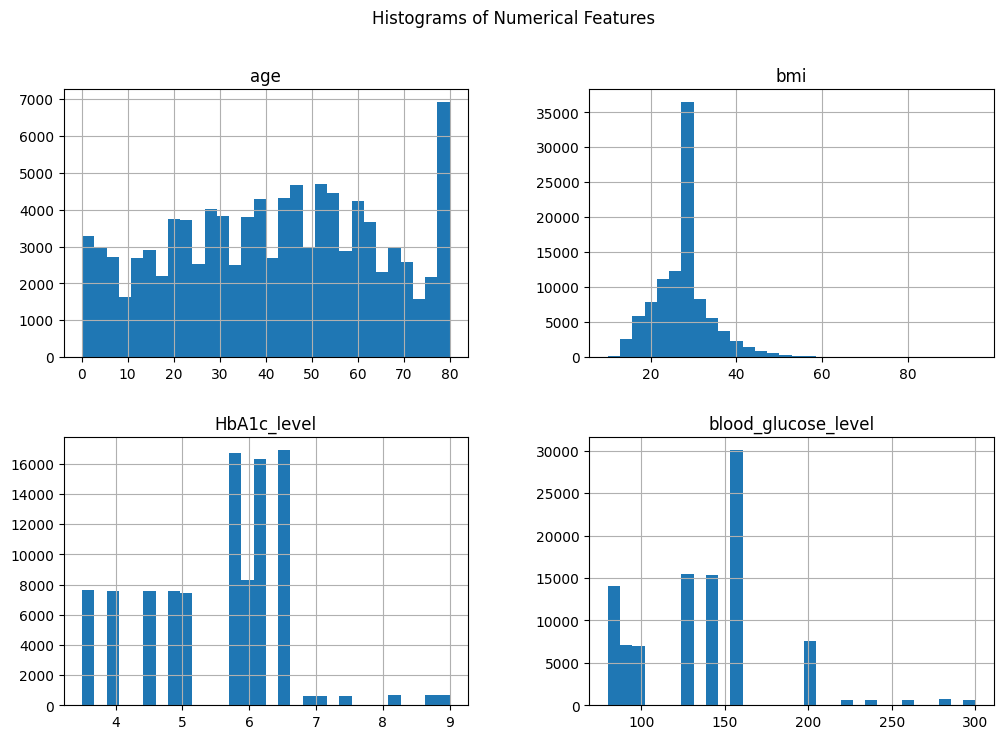

In [8]:
num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df[num_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')


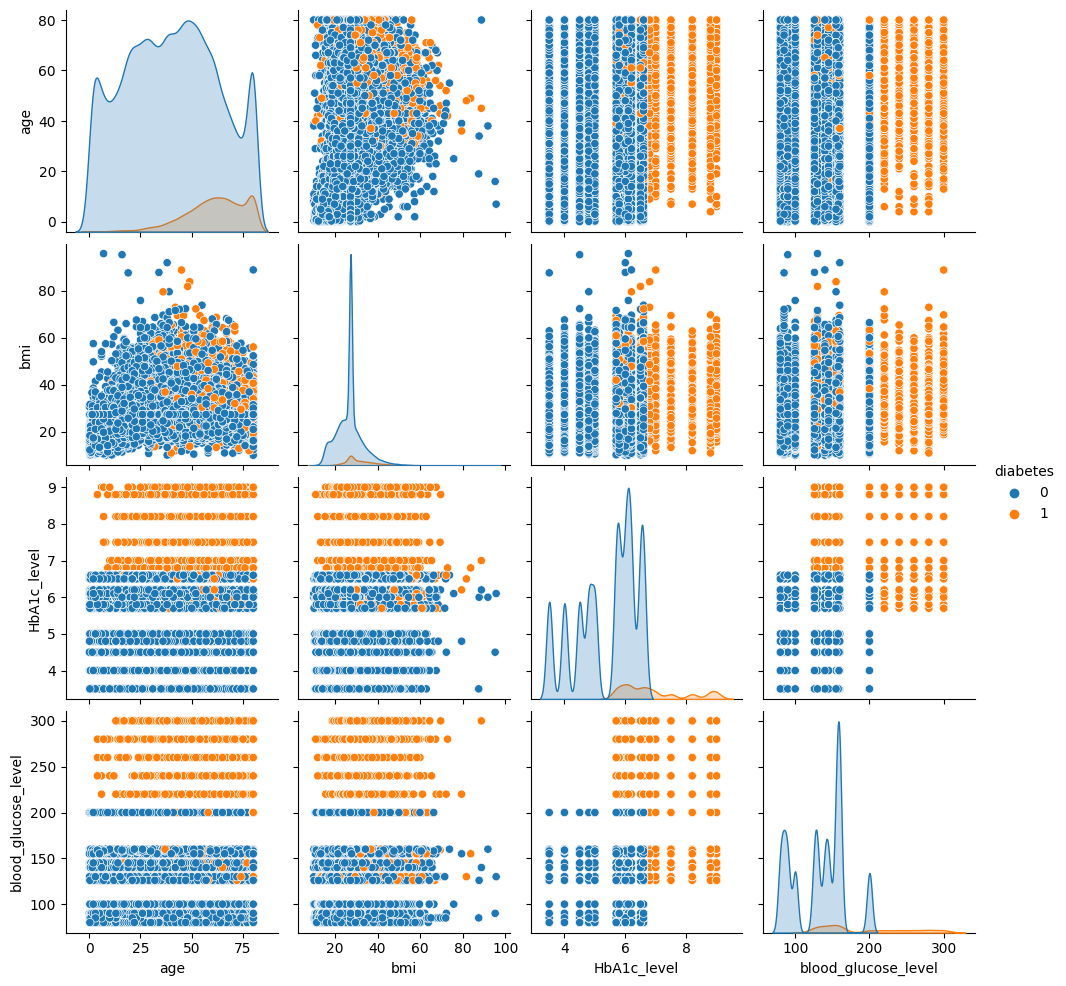

In [9]:
sns.pairplot(df, hue='diabetes', vars=num_cols)


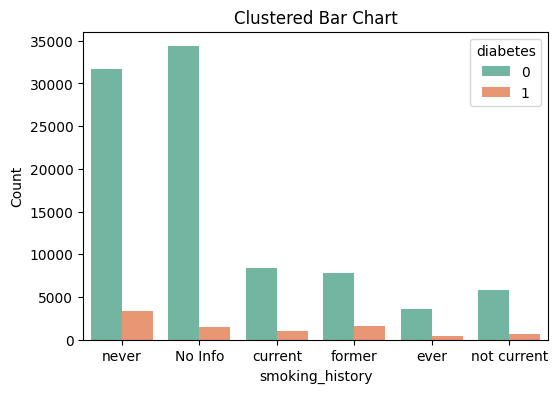

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='smoking_history', hue='diabetes', data=df, palette='Set2')
plt.title('Clustered Bar Chart')
plt.xlabel('smoking_history')
plt.ylabel('Count')
plt.legend(title='diabetes')
plt.show()

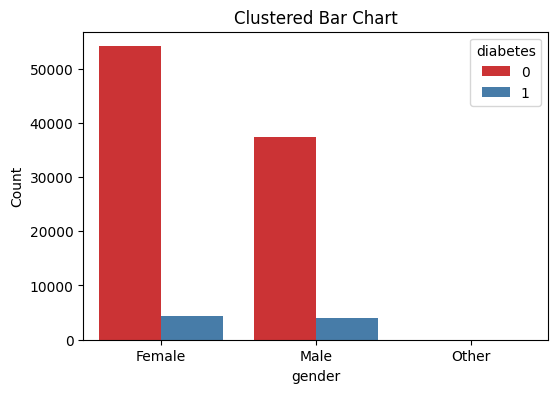

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='diabetes', data=df, palette='Set1')
plt.title('Clustered Bar Chart')
plt.xlabel('gender')
plt.ylabel('Count')
plt.legend(title='diabetes')
plt.show()

<Figure size 1400x1200 with 0 Axes>

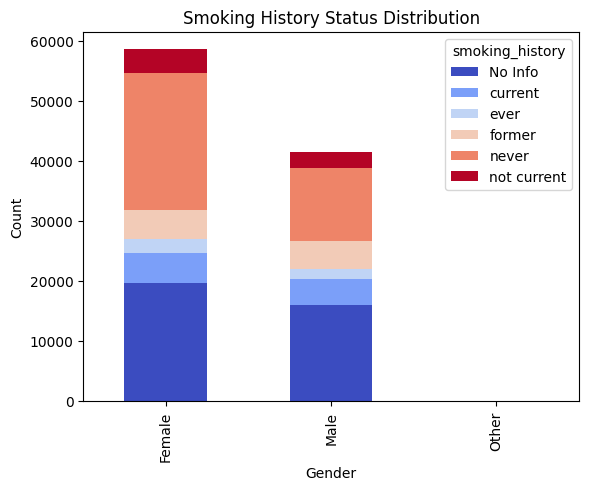

In [12]:
plt.figure(figsize=(14,12))
pd.crosstab(df['gender'], df['smoking_history']).plot(kind='bar', stacked=True ,cmap='coolwarm')
plt.title('Smoking History Status Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

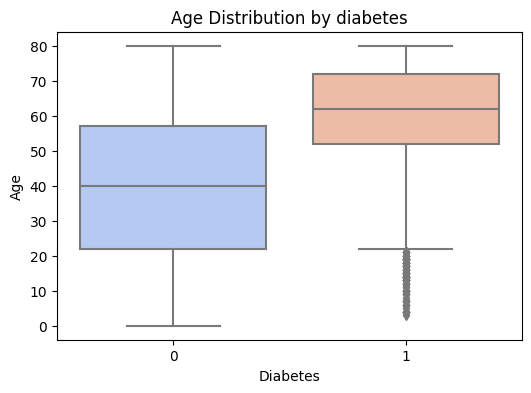

In [13]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='diabetes', y='age', data=df, palette='coolwarm')
plt.title('Age Distribution by diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Age')
plt.show()

In [14]:
cat_col = [i for i in df.columns if df[i].dtypes == 'object']
from sklearn.preprocessing import LabelEncoder
for i in cat_col :
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


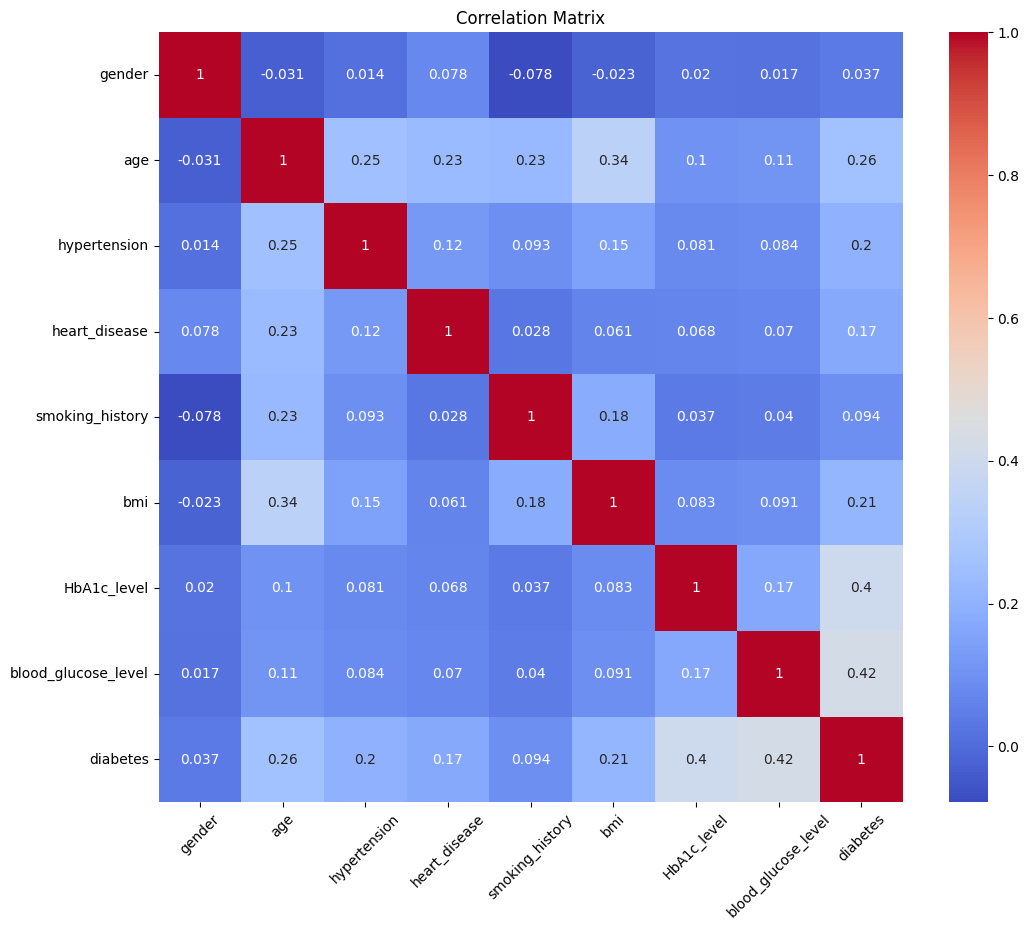

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.xticks(rotation=45)
plt.title('Correlation Matrix')
plt.show()


In [17]:
threshold = 0.03
correlation_matrix = df.corr()
high_correlation_features = correlation_matrix.index[abs(correlation_matrix['diabetes'])>threshold].tolist()
high_correlation_features.remove('diabetes')
print(high_correlation_features)

X = df[high_correlation_features]
Y = df['diabetes']

['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']


In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state= 55)

In [19]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [20]:
y_pred = model.predict(x_test)
print(accuracy_score(y_test ,y_pred))

0.96035


In [21]:
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [22]:
y_pred1 =svm.predict(x_test)
print(accuracy_score(y_test,y_pred1))

0.95015


In [23]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

In [24]:
knn.fit(x_train ,y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
y_pred2 =knn.predict(x_test)
print(accuracy_score(y_test ,y_pred2))

0.9529


In [26]:
rf = RandomForestClassifier()
rf.fit(x_train , y_train)

RandomForestClassifier()

In [27]:
y_pred_rf =rf.predict(x_test)
print(accuracy_score(y_test ,y_pred_rf))

0.9721
